In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams # figure size
from plotnine import ggplot, aes, geom_point, labs, geom_histogram, geom_boxplot, geom_line, stat_summary # ggplot
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # Ignores stupid ahh deprecation warnings
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

In [2]:
import pandas as pd

# Load the dataset (ensure the file path is correct)
auto = pd.read_csv('auto-mpg (1).csv')  # Replace with your file path if needed

# Rearrange data sets to place 'car name' first, if it exists
if 'car name' in auto.columns:
    columns = ['car name'] + [col for col in auto.columns if col != 'car name']
    auto = auto[columns]

# Correct the year format
if 'model year' in auto.columns:
    auto['model year'] = auto['model year'] + 1900

# Convert 'horsepower' to numeric, replacing non-numeric values with NaN
if 'horsepower' in auto.columns:
    auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')

# Fill NaN values in 'horsepower' column with the mean
if auto['horsepower'].isnull().sum() > 0:
    auto['horsepower'] = auto['horsepower'].fillna(auto['horsepower'].mean())

# Display dataset information and a preview
print(auto.info())
print(auto.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car name      398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    398 non-null    int64  
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model year    398 non-null    int64  
 8   origin        398 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB
None
                    car name   mpg  cylinders  displacement  horsepower  \
0  chevrolet chevelle malibu  18.0          8         307.0         130   
1          buick skylark 320  15.0          8         350.0         165   
2         plymouth satellite  18.0          8         318.0         150   
3              amc rebel sst  16.0          8         3

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='model year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='horsepower', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='model year', ylabel='cylinders'>,
        <Axes: xlabel='origin', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='

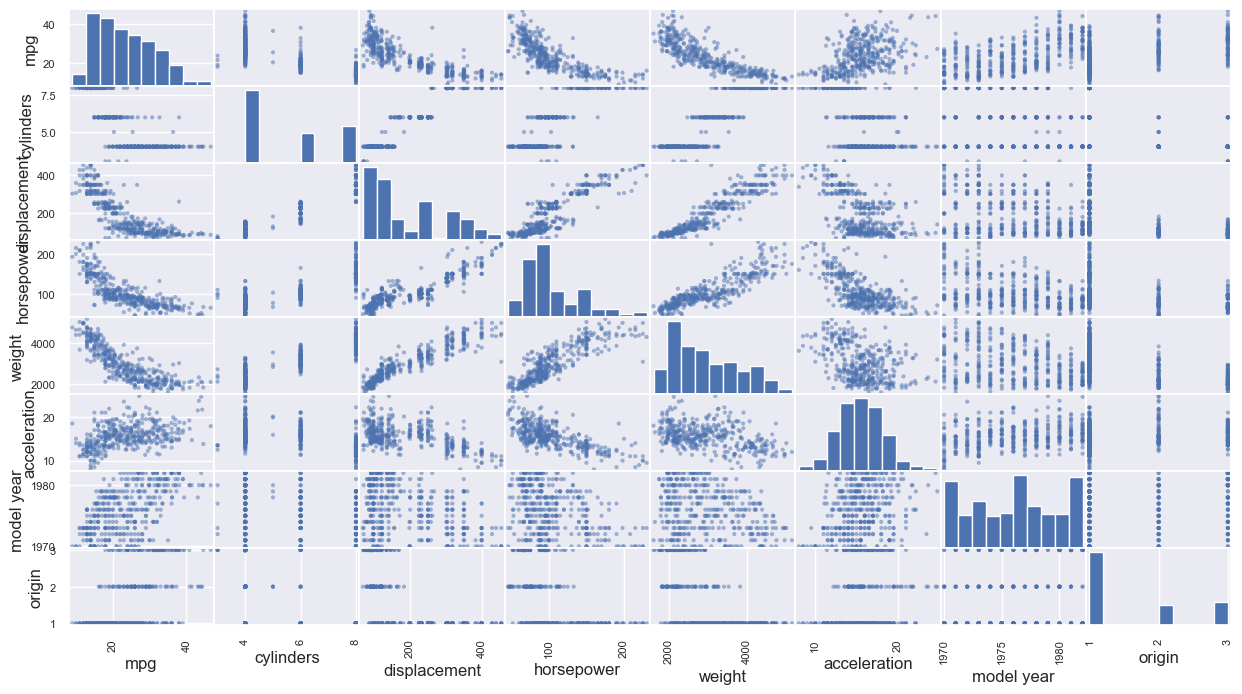

In [3]:
#set the size of the figure
sns.set_theme(rc={'figure.figsize': (15, 8)})

#create a matrix of scatter plots, creates scatter plots for each pari-wise relationship between all the columns/features
#diagonal contains all the hisograms for our data aswell
pd.plotting.scatter_matrix(auto)

<Axes: xlabel='horsepower', ylabel='mpg'>

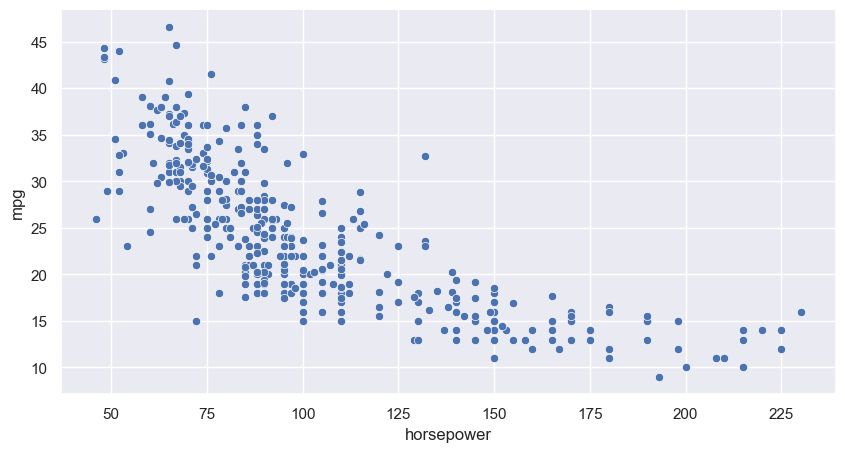

In [4]:
rcParams['figure.figsize'] = [10,5]

#select a plot for a closer look, choose the plot to show the relationship between horsepower and mpg
sns.scatterplot(data = auto, x="horsepower", y="mpg")

#we can see that there is a strong negative nonlinear relationship between weight and mpg

<Axes: xlabel='horsepower', ylabel='Count'>

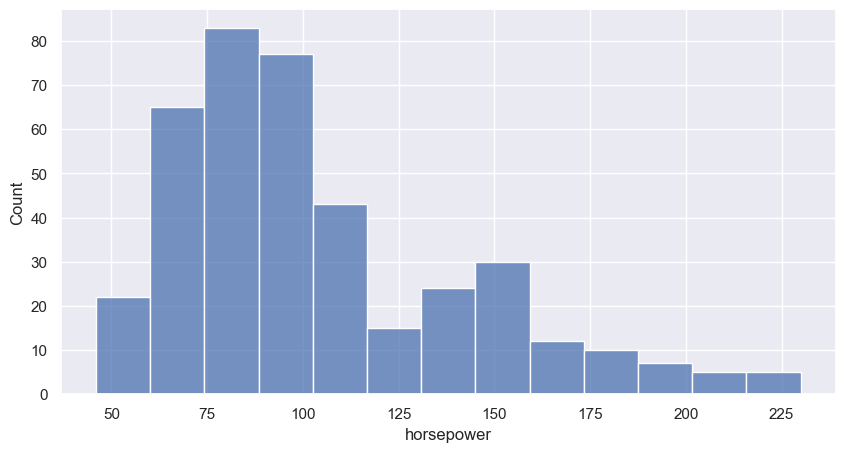

In [5]:
#show the histogram for 'horsepower'
sns.histplot(data = auto, x = 'horsepower')

#Horsepower is right skewed, shows us that manufacturers prefer to make lower horsepower cars rather than higher ones
#could be be because manufacturers want to make cars wtih a higher mpg, and from the previous plots we have seen, there is a relationship between horsepower and MPG.

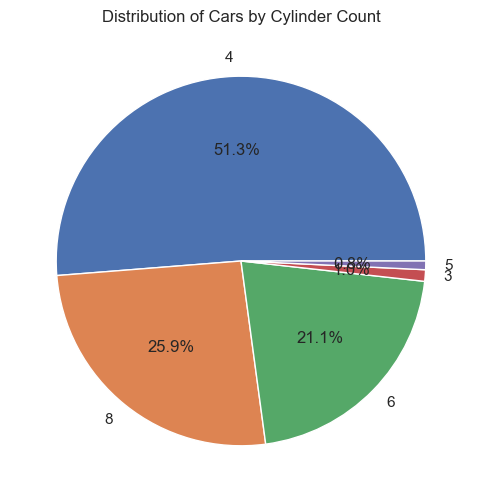

In [9]:
# This pie chart shows the distribution of cars by the number of cylinders.
# The function counts each unique cylinder catagory, which is  percentage of total with labels and percentages displayed on each slice.
cylinder_counts = auto['cylinders'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(cylinder_counts, labels=cylinder_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Cars by Cylinder Count')
plt.show()

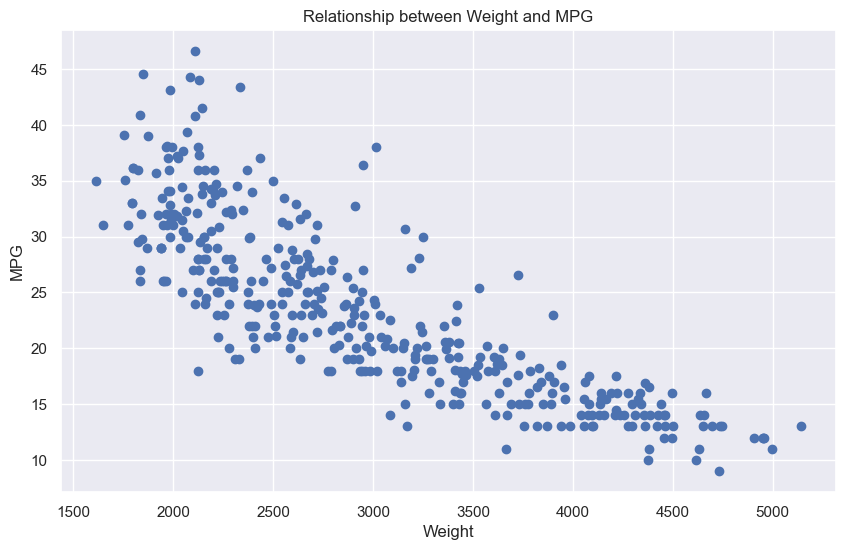

In [10]:
#This scatter plot shows the relationship between a car's weight and it's fuel efficiency (MPG).
# The negatie correlation shows that as the weight of a car increases, its miles per gallon, decreases indicates that heavy cars tend to ahve less fuel efficiency.

plt.figure(figsize=(10, 6))
plt.scatter(auto['weight'], auto['mpg'])
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Relationship between Weight and MPG')
plt.show()

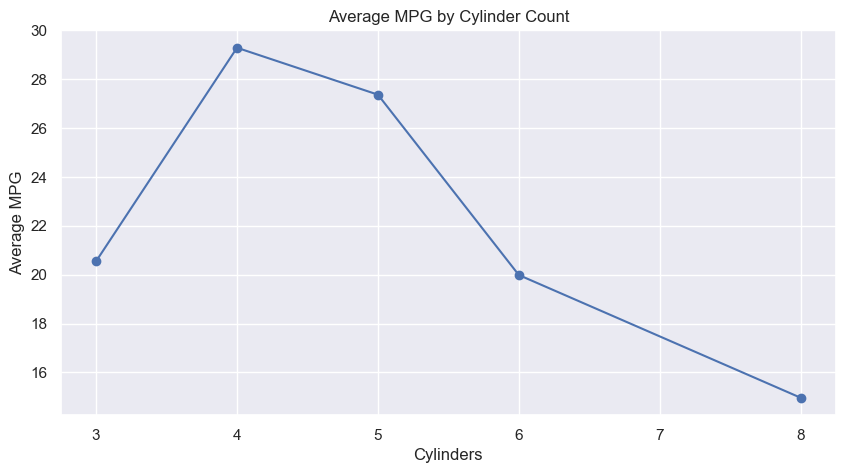

In [11]:
# The line plot shows the relationship weten the number of cylinders and the average miles per gallon (MPG) for cars.
# It illustrates how fuel efficiency (MPG) varies based on cylinder count, helping to reveal trends like whether cars with more cylinders have a lower or higher (MPG)
average = auto.groupby('cylinders')['mpg'].mean()
plt.plot(average.index, average.values, marker='o')
plt.xlabel('Cylinders')
plt.ylabel('Average MPG')
plt.title('Average MPG by Cylinder Count')
plt.show()


Intercept:  [25.51226708]
Coefficients:  [[0.2419704  0.01047478]]
Accuracy: 0.848
Mean Squared Error: 270.031
Mean Absolute Error: 12.136
Explained Variance Score: 0.857

Model Equation: Y = 25.5123 + (0.2420 * displacement) + (0.0105 * weight)


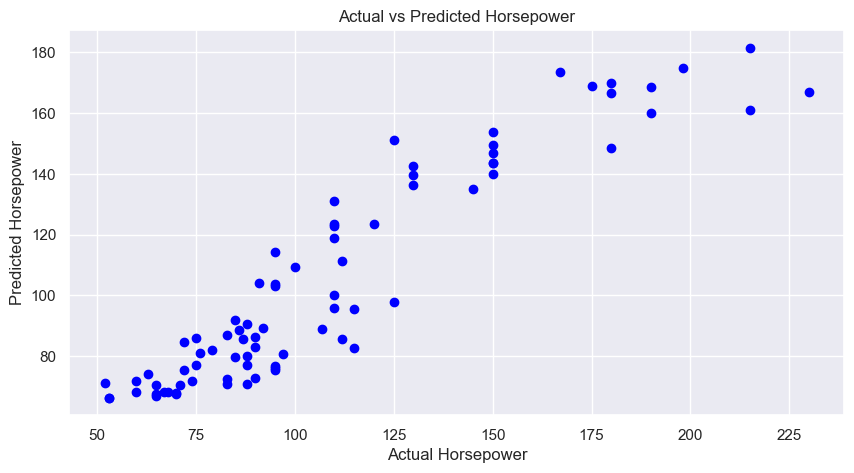

In [12]:


# Set our x values to displacement and weight
# Set our y value (predicted value) to be the vehicle's horsepower
mult_x = auto[['displacement', 'weight']]
mult_y = auto[['horsepower']]

# Split the training and test data
multi_train_x, multi_test_x, multi_train_y, multi_test_y = train_test_split(mult_x, mult_y, test_size=0.2, random_state = 42)

# Create and fit the model
regr = linear_model.LinearRegression()
regr.fit(multi_train_x, multi_train_y)
multi_y_pred = regr.predict(multi_test_x)

# Print descriptive stats of the model
print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)
print('Accuracy: %.3f' % r2_score(multi_test_y, multi_y_pred))
print('Mean Squared Error: %.3f' % mean_squared_error(multi_test_y, regr.predict(multi_test_x)))
print('Mean Absolute Error: %.3f' % mean_absolute_error(multi_test_y, multi_y_pred))
print('Explained Variance Score: %.3f' % explained_variance_score(multi_test_y, multi_y_pred))
print("\nModel Equation: Y = %.4f + (%.4f * displacement) + (%.4f * weight)" % (regr.intercept_, regr.coef_[0][0], regr.coef_[0][1]))

# Plot real values against predicted values
plt.scatter(x=multi_test_y,y=multi_y_pred,color ='blue')
plt.xlabel('Actual Horsepower')
plt.ylabel('Predicted Horsepower')
plt.title('Actual vs Predicted Horsepower')

plt.show()

Intercept:  [25.51226708]
Coefficients:  [[0.2419704  0.01047478]]
Accuracy: 0.848
Mean Squared Error: 270.031
Mean Absolute Error: 12.136
Explained Variance Score: 0.857

Model Equation: Y = 25.5123 + (0.2420 * displacement) + (0.0105 * weight)
np.linspace for X[:, 0]: [ 68. 455.]
xDeltaDispl [[ 68. 455.]
 [ 68. 455.]]
xDeltaWeight [[1613. 1613.]
 [5140. 5140.]]
yDeltaHPWR [[ 58.86207828 152.50462407]
 [ 95.80663538 189.44918117]]


(46.0, 230.0)

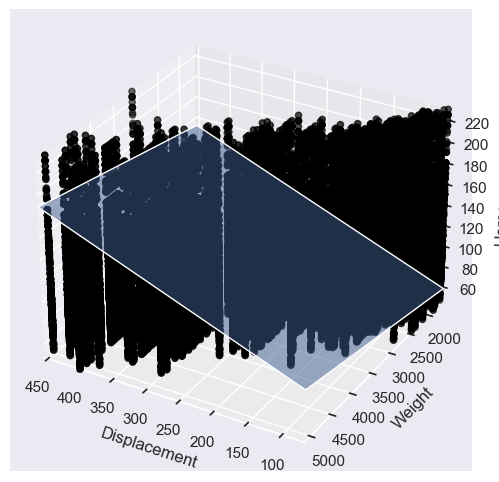

In [ ]:
# linear regression
mult_x = auto[['displacement', 'weight']].values
mult_y = auto[['horsepower']].values

# Split the training and test data
multi_train_x, multi_test_x, multi_train_y, multi_test_y = train_test_split(mult_x, mult_y, test_size=0.2,random_state = 42)

# Create and fit the model
regr = linear_model.LinearRegression()
regr.fit(multi_train_x, multi_train_y)
multi_y_pred = regr.predict(multi_test_x)

# Print descriptive stats of the model
print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)
print('Accuracy: %.3f' % r2_score(multi_test_y, multi_y_pred))
print('Mean Squared Error: %.3f' % mean_squared_error(multi_test_y, regr.predict(multi_test_x)))
print('Mean Absolute Error: %.3f' % mean_absolute_error(multi_test_y, multi_y_pred))
print('Explained Variance Score: %.3f' % explained_variance_score(multi_test_y, multi_y_pred))
print("\nModel Equation: Y = %.4f + (%.4f * displacement) + (%.4f * weight)" % (regr.intercept_, regr.coef_[0][0], regr.coef_[0][1]))

# Set up the figure
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d') # 3d plot
# Plot the points
ax.scatter3D(mult_x[:, 0], mult_x[:, 1], mult_y, color="Black")
# Plot the regression as a plane
xDeltaDispl, xDeltaWeight = np.meshgrid(
    np.linspace(mult_x[:, 0].min(), mult_x[:, 0].max(), 2), # just the min and max 2 values
    np.linspace(mult_x[:, 1].min(), mult_x[:, 1].max(), 2), # just the min and max 2 values
)
print('np.linspace for X[:, 0]:',np.linspace(mult_x[:, 0].min(), mult_x[:, 0].max(), 2))
print('xDeltaDispl',xDeltaDispl)
print('xDeltaWeight',xDeltaWeight)
# totally four pairs of points (xDeltaDispl, xDeltaWeight)
# calculate corresponding y value
yDeltaHPWR = (
    regr.intercept_[0]
    + regr.coef_[0][0] * xDeltaDispl
    + regr.coef_[0][1] * xDeltaWeight
)
print('yDeltaHPWR',yDeltaHPWR)
# now we plot our surface with 4 points (min max points)
ax.plot_surface(xDeltaDispl, xDeltaWeight, yDeltaHPWR, alpha=0.5)
# Axes labels
ax.set_xlabel('Displacement')
ax.set_ylabel('Weight')
ax.set_zlabel('Horsepower')
# Set the view angle
ax.view_init(30, 120)
# Set the limitation
ax.set_xlim(mult_x[:, 0].min(), mult_x[:, 0].max())  # Displacement range
ax.set_ylim(mult_x[:, 1].min(), mult_x[:, 1].max())  # Weight range
ax.set_zlim(mult_y.min(), mult_y.max())   # Horsepower range

Model Details:
Intercept: 1513.04
Coefficient: 7.59
Regression Equation: Weight = 1513.04 + 7.59 * Displacement

Numerical Analysis:
Mean Squared Error (MSE): 81591.51
Mean Absolute Error (MAE): 234.69
Explained Variance Score (EVS): 0.896
R-squared (R²): 0.8925


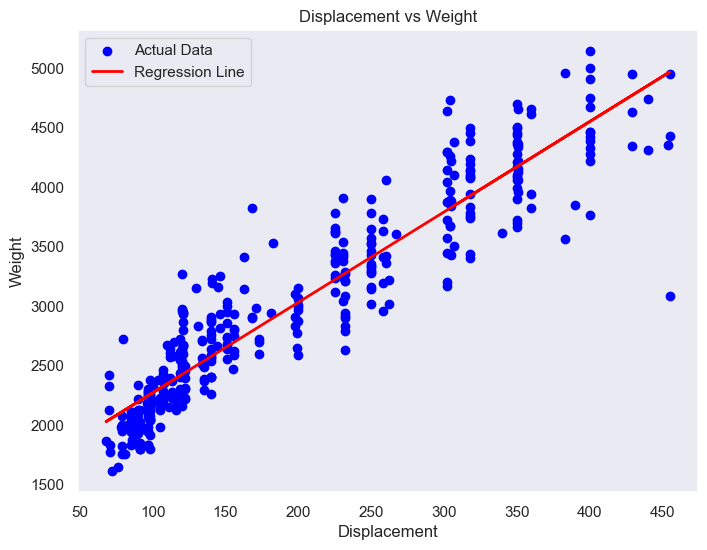

In [ ]:
X = auto[['displacement']]  # Predictor
y = auto['weight']          # Target

#split the training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Simple Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Regression equation
intercept = model.intercept_
coefficient = model.coef_[0]
regression_eq = f"Weight = {intercept:.2f} + {coefficient:.2f} * Displacement"

# Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print Regression Model Details
print("Model Details:")
print(f"Intercept: {intercept:.2f}")
print(f"Coefficient: {coefficient:.2f}")
print(f"Regression Equation: {regression_eq}")

# Print Numerical Analysis
print("\nNumerical Analysis:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Explained Variance Score (EVS): {explained_variance:.3f}")
print(f"R-squared (R²): {r2:.4f}")

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.title('Displacement vs Weight')
plt.xlabel('Displacement')
plt.ylabel('Weight')
plt.legend()
plt.grid()
splt.show()

Intercept:  57.285734867536604
Coefficients:  [-0.47337131  0.00125713]
R^2 Score: 0.740
Mean Squared Error: 13.997
Mean Absolute Error: 2.926
Explained Variance Score: 0.741

Model Equation: Y = 57.2857 + (-0.4734 * horsepower^1) + (0.0013 * horsepower^2)


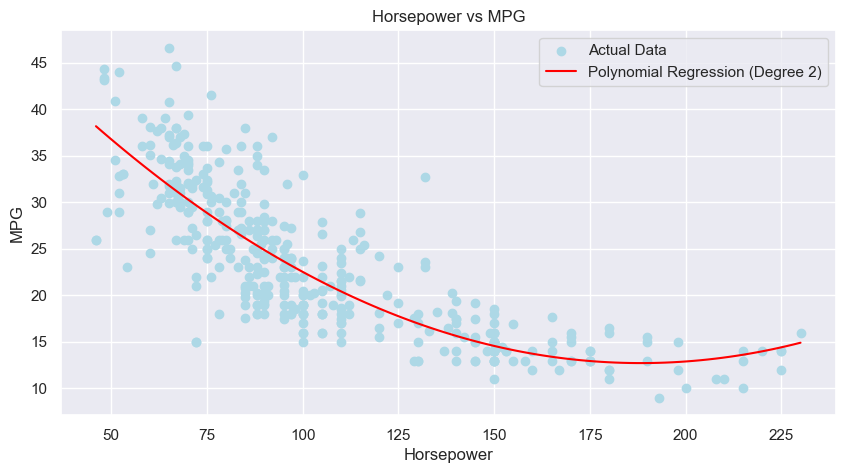

In [ ]:

# Load your dataset (ensure no missing values in relevant columns)
auto = auto.dropna(subset=['horsepower', 'mpg'])

# Set x and y values
poly_x = auto[['horsepower']].values  # Ensure 2D array
poly_y = auto[['mpg']].values         # Ensure 2D array

# Split the training and test data
poly_train_x, poly_test_x, poly_train_y, poly_test_y = train_test_split(poly_x, poly_y, test_size=0.2, random_state=42)

# Create polynomial features
degree = 2  #  degree of the polynomial
poly = PolynomialFeatures(degree=degree)
poly_train_x_transformed = poly.fit_transform(poly_train_x)
poly_test_x_transformed = poly.transform(poly_test_x)

# Create and fit the polynomial regression model
regr = LinearRegression()
regr.fit(poly_train_x_transformed, poly_train_y)
poly_y_pred = regr.predict(poly_test_x_transformed)

# Print descriptive stats of the model
print('Intercept: ', regr.intercept_[0])
print('Coefficients: ', regr.coef_.flatten()[regr.coef_.flatten() != 0.0])
print('R^2 Score: %.3f' % r2_score(poly_test_y, poly_y_pred))
print('Mean Squared Error: %.3f' % mean_squared_error(poly_test_y, poly_y_pred))
print('Mean Absolute Error: %.3f' % mean_absolute_error(poly_test_y, poly_y_pred))
print('Explained Variance Score: %.3f' % explained_variance_score(poly_test_y, poly_y_pred))

#Model Eq
coefficients = regr.coef_.flatten()
model_equation = "Y = %.4f" % regr.intercept_[0]
for i in range(1, len(coefficients)):
    model_equation += " + (%.4f * horsepower^%d)" % (coefficients[i], i)
print("\nModel Equation:", model_equation)

# Plot regression curve
plt.scatter(auto['horsepower'], auto['mpg'], color='lightblue', label='Actual Data')
x_range = np.linspace(min(poly_x), max(poly_x), 100).reshape(-1, 1)
y_range_pred = regr.predict(poly.transform(x_range))
plt.plot(x_range, y_range_pred, color='red', label=f'Polynomial Regression (Degree {degree})')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Horsepower vs MPG')
plt.legend()
plt.show()